In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime

from ML2_lib import RV_SGDAve
from ML2_lib import loss
from ML2_lib import plot_set

In [2]:
# 学習率は0.01/t * sqrt(d) ノイズは正規分布
X_mean = 5
X_var = 2
E_var = 2.2
w_star = np.array([1,2,3,4,5,6])
w_star = w_star.reshape(1,-1)
d = w_star.shape[1]
n = 10000
c = 5
noise = "normal"
rng = np.random.default_rng()
w_init = w_star + rng.uniform(-c,c,size=d)

son = loss.LinearQuadraticLoss()
RV = RV_SGDAve.RVSGDSimulation(w_star=w_star,n=n,E_var=E_var,X_mean=X_mean,X_var=X_var,noise=noise,loss_type=son,c=c,fixed_lr=True)

columns=['1', '2', '4','5','10','20']
k_list = [0,1,3,4,9,19]
title = f"noise type = {noise} Error variable = {E_var}"

  0%|          | 0/1000 [00:00<?, ?it/s]

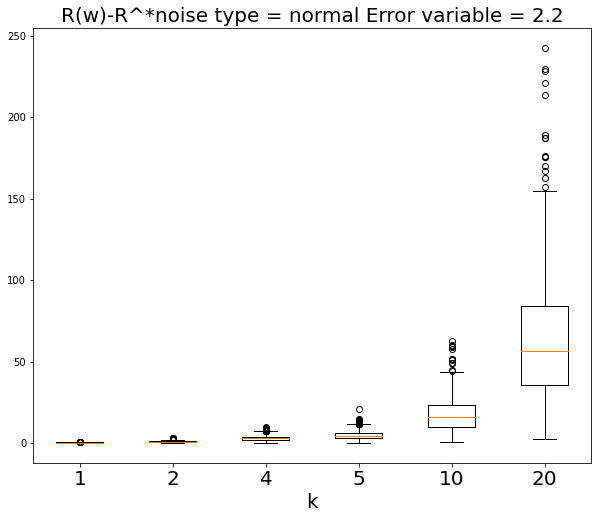

In [3]:
trail_num  = 1000
_, result_loss_gauss = RV.many_trails(trial_num=1000,max_k=20)
plot_set.box_plot_k(result=result_loss_gauss,k_string=columns,k_list=k_list,title=title)

In [4]:
df = pd.DataFrame(result_loss_gauss)
now = datetime.datetime.now()
df.to_csv(f"save_result_data/{now:%m月%d日%H:%M:%S}_noise_{noise}_trial_num_{trail_num}_E_var{E_var}.csv")

In [5]:
noise = "lognormal"
E_var = 1.75
RV = RV_SGDAve.RVSGDSimulation(w_star=w_star,n=n,E_var=E_var,X_mean=X_mean,X_var=X_var,noise=noise,loss_type=son,c=c,fixed_lr=True)

columns=['1', '2', '4','5','10','20']
k_list = [0,1,3,4,9,19]
title = f"noise type = {noise} Error variable = {E_var}"

  0%|          | 0/1000 [00:00<?, ?it/s]

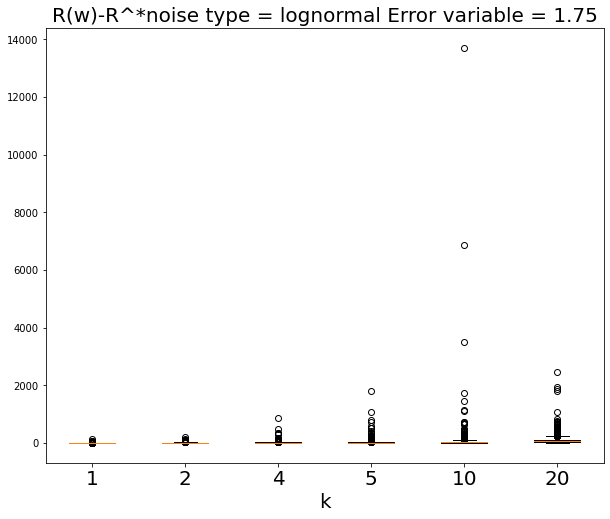

In [6]:
trail_num  = 1000
_, result_loss_gauss = RV.many_trails(trial_num=1000,max_k=20)
plot_set.box_plot_k(result=result_loss_gauss,k_string=columns,k_list=k_list,title=title)

In [7]:
df = pd.DataFrame(result_loss_gauss)
now = datetime.datetime.now()
df.to_csv(f"save_result_data/{now:%m月%d日%H:%M:%S}_noise_{noise}_trial_num_{trail_num}_E_var{E_var}.csv")


In [14]:

tr = RV.transition(w_init=w_init,k = 10)

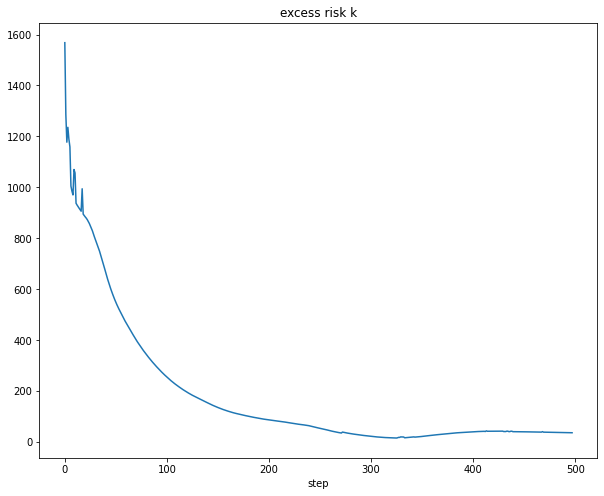

In [15]:
fig = plt.figure(figsize=(10.0, 8.0))
ax1 = fig.add_subplot(111)

ax1.plot(tr)
ax1.set_xlabel("step")
ax1.set_title('excess risk k')
plt.show()